# Lecture 1 - Frequentist and Bayesian Overview, Probabilistic Generative Models, and `Stan`

## High-Level Goals of this Course

- Use Bayesian reasoning when modeling data.
- Apply Bayesian statistics to regression models.
- Compare and contrast Bayesian and frequentist methods, and evaluate their relative strengths.
- Use appropriate statistical libraries and packages for performing Bayesian inference.

## Course Overview

- **Non-project MDS course:** eight lectures and four labs.
- Our focus is **model-building**, **computation**, and **interpretation of results**.
- We will build models in [`Stan`](https://mc-stan.org/) along with [`rstan`](https://mc-stan.org/users/interfaces/rstan).
- Knowing how and when to use different statistical distributions is a **great asset**.
- `R` + `Stan` for lectures and labs.

## Textbook

We will use a textbook in this course. Its name is [**Bayes Rules! An Introduction to Applied Bayesian Modeling**](https://www.bayesrulesbook.com/)). **We will be posting suggested and optional readings of this book before our lecture time.**

## Today's Learning Objectives

1. Review statistical inference (frequentist so far!).
2. Pave the way to Bayesian statistics.
3. Introduce probabilistic generative models.
4. Illustrate the basic use of `Stan` and `rstan` via Monte Carlo simulations.
5. Differentiate probability and likelihood in Statistics.

## Loading Libraries

In [1]:
library(tidyverse)
library(infer)
library(tidyverse)
library(cowplot)
library(datateachr)
library(bayesrules)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors



Attaching package: ‘cowplot’




The following object is masked from ‘package:lubridate’:

    stamp




## 1. Review of Frequentist Statistical Inference

In the frequentist courses, we have used **observed data** (coming from a random sample) to **estimate** and **characterize uncertainty** in **unknown** (or **latent**) **population** quantities of interest. For instance:

- An **unknown** population mean $\mu$.
- An **unknown** population variance $\sigma^2$.
- An **unknown** population median $\text{M}$.

However, what do we mean when we say **latent population** quantities? Let us find it out.

### 1.1. Latent Variables

These <font color='red'>latent quantities</font> may be real **but not directly observable**. Hence, they are linked to other <font color='blue'>observable variables</font>. For example:

- Using <font color='blue'>online ad click data</font> to estimate <font color='red'>the total lifetime revenue</font>.
- Using <font color='blue'>genome sequencing</font> to infer <font color='red'>the origin of a virus during an outbreak</font>.
- Using <font color='blue'>robotic Light Detection and Ranging (LiDAR) sensors</font> to estimate <font color='red'>the robot's position</font>.

Or **completely hypothetical**:

- Using <font color='blue'>tennis game win/loss data</font> to infer a <font color='red'>ranking of players</font>.
- Using <font color='blue'>text data</font> to learn <font color='red'>the underlying hierarchy of topics</font>.

```{important}
For these inquiries, the frequentist statistician's usual hammers are **point estimates** and **confidence intervals**.
```

### 1.2. Why Care About Uncertainty?

> *Cannot we just collect more data?*

Not if it is **expensive** (e.g., rocket telemetry), **fundamentally limited** (e.g., robot odometry), or **outright impossible** (e.g., ancestral species).

<br>
<center>
    <table><tr>
        <td><img width="800" src="https://i.ytimg.com/vi/1yBwWLunlOM/maxresdefault.jpg"/></td><td><img width="500" src="https://a.pololu-files.com/picture/0J5749.1200.jpg?01310609b6b36b53709bd5b0e302a69b"/></td>
        <td><img width="500" src="https://i.pinimg.com/originals/38/83/ae/3883ae59ddeba67b85aa1734fa58c233.jpg"/></td>
        </tr></table>
</center>
<br>

### 1.3. What is a Confidence Interval (CI)?

If we care about uncertainty in a **frequentist** inferential approach, what is a confidence interval?

<br>
<center><img width="550" src="https://online.stat.psu.edu/statprogram/sites/statprogram/files/inline-images/statprogtdist.png"/></center>
<br>

Let us start with the first **in-class question**.

```{exercise}
:label: lecture1-q1

**Answer TRUE or FALSE:**

**Assuming a random sample of size $n$ composed of the random variables $X_1, X_2, \dots, X_n$** (not observed sampled values!), a frequentist 90%-confidence interval (CI) is a random interval that contains an unknown fixed population parameter of interest with probability 90% before observing the random data.

**A.** TRUE

**B.** FALSE
```

```{exercise}
:label: lecture1-q2

**A CI Example with Heights**

Suppose I measure the height $X_i$ ($i=1, 2, \dots, n$) of a **simple randomly selected** (i.e., all subjects have the same probability of being selected) subset of students in this room. My **population of interest** is the current MDS cohort.

Assume I know our true population standard deviation $\sigma$, and I want to estimate our unknown mean $\mu$ with the sample mean 

$$\bar X = \frac{1}{n}\sum_{i=1}^n X_i.$$ 

I design my 95% confidence interval using the Central Limit Theorem (CLT) formula:

$$\bar X - 1.96 \frac{\sigma}{\sqrt{n}} \leq \mu \leq \bar X + 1.96 \frac{\sigma }{\sqrt{n}},$$

where $1.96$ is the $0.975$-quantile of the Standard Normal distribution.

**Is this a valid confidence interval for $\mu$?**

**A.** Yes.

**B.** No.
```

Now, let us proceed with an open-ended question.

```{exercise}
:label: lecture1-q3

**A Financial CI Example**

<br>
<center><img width="450" src="https://miro.medium.com/max/2924/1*cF57WKAdzfYrPyZ8buaYAw.jpeg"/></center>
<br>

Say you collect some yearly **log returns** $X_1, \dots, X_n$ for a financial asset, and use $\bar X = \frac{1}{n}\sum_{i=1}^n X_i$ to estimate the population mean.

But real **log returns** exhibit "very large/small values" much more frequently than a Normal distribution would predict. Your boss knows this and says: 

> "I know what we'll do! We'll model each $X_i$ with a Cauchy distribution." 

Therefore, you **might** (*well...*) be able to compute a more suitable CI.

Nevertheless, you realize that [Cauchy distributions](https://en.wikipedia.org/wiki/Cauchy_distribution) have an undefined variance!

**How do you compute a confidence interval?**
```

```{important}
As a final thought now, before getting into our Bayesian introduction:

> **Even a minor change to a simple problem makes things significantly harder for frequentist methods!!!!!**
```

## 2. Bayesian Statistics

The **Bayesian statistical approach** addresses these challenges.

- Very flexible, handles most analysis settings.
  - Missing data, non-standard data types, non-iid, weird loss functions, adding expert knowledge.
  - *Every problem is the same, but your computer might disagree...* 
- Valid inference for any (finite) amount of data.

- **Now the population parameters of interest are random variables!** They have prior and posterior distributions.
- Easy to interpret uncertainty for the population parameters.
- Posterior distribution is a "one-stop-shop" for **prediction**, **inference**, **decision-making**, etc.
- Recursive updating.

**What is recursive updating?**

<br>
<center><img width="700" src="https://www.bayesrulesbook.com/chapters/figs/chapter_1/bayes_diagram.png"/></center>

*Source: [Johnson et al. (2021)](https://www.bayesrulesbook.com/chapter-1.html)*

Let us put this concept with an example of an Italian restaurant:

<center><img width="800" src="https://www.bayesrulesbook.com/chapters/figs/chapter_1/restaurant_diagram.png"/></center>

*Source: [Johnson et al. (2021)](https://www.bayesrulesbook.com/chapter-1.html)*

```{attention}
**Nonetheless, there is no free lunch...**

- We would often need to be much more careful about computation.
- It requires slightly more model design work (prior).
- Less widely used in some areas of practice, e.g., medicine.
  - This is changing over time!
```

## 3. Generative Models

- **For both frequentist and Bayesian statistics**, a generative model is a simplified mathematical model for some reality: a "story about how your data were created." 
- The term **generative** means the model can be used to make *synthetic* data (i.e., running computational simulations!)

### 3.1. First Example

<br>
<center><img width="450" src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b2/Simple_gravity_pendulum.svg/1200px-Simple_gravity_pendulum.svg.png"/></center>

Newton's laws of dynamics $F = m \times a$ can be used to simulate position versus time given forces.
- **What if I had noisy measurements of $F$, $m$, *and* $a$ and wanted to infer their true values?**

### 3.2. Second Example

We can model $f(\cdot)$ for whether it will rain today given a vector of **conditions/features** $\mathbf{X}$, $f(\mathbf{X}) \to \{\text{yes}, \text{no}\}$. What class of response is $f(\mathbf{X})$?

$f(\mathbf{X})$ is Bernoulli type!

Nonetheless, we cannot account for **everything**. Maybe only temperature, pressure, cloud cover, etc. Then, how do we deal with uncertainty in rain even under same measured conditions?

**We can incorporate randomness into this model!** This is analogous to $\varepsilon$ on the right-hand side of a Ordinary Least-Squares (OLS) regression equation.

### 3.3. Probabilistic Generative Models

These models incorporate randomness into the system of interest. We design them using **probability theory** to add **wiggle room** to everything:

  - We can incorporate **noise in measurements** (e.g., outputs coming from the $F = m \times a$ model).
  - They can be **overly simplified models with incomplete measurements** (e.g., rainy day model).
  - They can even incorporate **unobservable latent variables** (e.g., hypothetical tennis rankings).

### 3.4. A Probabilistic Generative Model with a Bottle Cap Flip 

You have arrived early to a movie with a friend, and have great seats. However, both of you need to use the washroom. Initially, you decide to flip a coin to see who gets to go first and who will watch the seats.

**But it is 2025 and nobody carries coins any more!** All you have is a bottle cap from your drink:

<br>
<center><img width="400" src="https://img1.cgtrader.com/items/730507/8a23f572f4/plastic-pet-bottle-cap-3d-model-obj-mtl-fbx-stl-blend.png"/></center>

**Let us start with a FREQUENTIST inferential problem:**

What is the probability $\pi$ the bottle cap will land right side up? We can use $n$ trial tosses as data.

```{attention}
Let us reflect about the implications of using $n$ trial tosses as data. We will obtain an estimate $\hat{\pi}$ as a relative **frequency** coming from this data. Hence, the name **frequentist**.
```

**The Math of Generative Model for a Bottle Cap Flip**

Any probabilistic generative model involves setting up your **random variable** of interest along with your assumed distribution.

Thus, we have the following:

$$X_i \sim \mathrm{Bernoulli}(\pi) \quad \text{for} \quad i = 1, \dots, n.$$

- $\pi \in [0, 1]$ is the **unknown parameter** we want to estimate: **the probability the bottle cap will land right side up**.
- $X_i$ are the results of each bottle cap toss ($1 = \text{right side up}$ or $0 = \text{upside down}$).
- $X_i = 1$ is the success with probability $\pi$.

The **Bernoulli approach** is a **basic model** for this case; we could design another more complex probabilistic model that considers initial conditions, wind, and collisions!

## 4. `Stan` and `rstan` Basics

The bottle cap example was set up as a **FREQUENTIST** inferential problem (*an unknown **FIXED** parameter $\pi$ we aim to estimate*). This probabilistic generative model is a Bernoulli trial. 

Since the frequentist approach relies on repeating this bottle cap toss many times to estimate $\pi$, i.e., $n \rightarrow \infty$ (**not feasible to do it during our lecture time!**), we will computationally simulate this system with a Monte Carlo simulation in a worksheet (not for marks) during `lab1`. 

By definition, a Monte Carlo simulation will computationally repeat the event of interest $n$ times with random inputs to obtain our $n$ outputs of interest (a binary outcome in this case).

<center><img width="900" src="https://m-clark.github.io/easy-bayes/img/bayes_doc/r_stan.png"/></center>
<br>

We can easily do this via the base `R` function `rbernoulli()` from `purrr`. But we will use this example to introduce `Stan` and `rstan`. 

`Stan` is a probabilistic `C++`-based programming language for Bayesian statistical inference (**but it can also perform simple Monte Carlo simulations**). The `R` package `rstan` will allow pulling the simulation outputs from `Stan`.

### 4.1. Coding the Model and Running your Simulation

In general, we will follow these steps:

1. Code up our generative model in `Stan`.
3. Specify observed values of data to estimate using `rstan` (**not necessary for Monte Carlo simulations**). 
2. Generate **synthetic data**.
4. Perform inference with your simulation outputs.

**The generative model is all you need (and all you get!)**

- Once you have a generative model, you can derive **everything**: tests, inference, etc.
- If your model **can** generate it, it will be handled in inference:
  - missing data, dependence, complex data types, etc.
- If your model **cannot** generate it, it **will not be handled**.

### 4.2. Can We Theoretically Estimate $\pi$?

Yes, we can! **Maximum likelihood estimation** (MLE) is the standard frequentist approach. Recall the procedure from [**DSCI 551's `lecture7`**](https://ubc-mds.github.io/DSCI_551_stat-prob-dsci/notes/07_lecture-maximum-likelihood-estimation.html).

How do we find the maximum likelihood estimate for $\pi$ between 0 and 1? 

- We set up the Bernoulli trial for one toss:

$$\mathscr{l}(\pi \mid x_i) = P(X_i = x_i \mid \pi) = \pi^{x_i}(1 - \pi)^{1 - x_i} \quad \text{for} \quad x_i = 0, 1.$$

- We obtain the joint likelihood function with $n$ iid tosses:

```{math}
\begin{align*}
\mathscr{l}(\pi \mid x_1, \dots, x_n) &= \prod_{i=1}^n \pi^{x_i}(1 - \pi)^{1 - x_i} \\
&= \pi^{\sum_{i = 1}^n x_i}(1 - \pi)^{n - \sum_{i = 1}^n x_i}.
\end{align*}
```

- Then, the log-likelihood function:

$$
\log \mathscr{l}(\pi \mid x_1, \dots, x_n) = \sum_{i = 1}^n x_i \log(\pi) + \bigg(n - \sum_{i = 1}^n x_i \bigg) \log(1 - \pi).
$$

- We take the first partial derivative of the log-likelihood function with respect to $\pi$, set it to 0, and solve for $\pi$:

$$\hat \pi = \frac{1}{n}\sum_{i=1}^n X_i.$$

### 4.3. Uncertainty in $\pi$ 

**How can we characterize the uncertainty in $\pi$ (without doing boatloads of math)?**

A bootstrap CI might be the answer, but what if we only have $n = 10$ replicates?

In [2]:
options(repr.matrix.max.rows = 10)
library(purrr)
library(tidyverse)
library(infer)

# Obtaining sample of size n = 10
set.seed(553)
sample_n10 <- tibble(flip = as.character(rbernoulli(n = 10, p = 0.7)))
sample_n10

Warning message:
“`rbernoulli()` was deprecated in purrr 1.0.0.”


flip
<chr>
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
FALSE


In [3]:
# Obtaining bootstrap distribution via infer
set.seed(553)
bootstrap_distribution <- sample_n10 |>
  specify(response = flip, success = "TRUE") |>
  generate(reps = 1000, type = "bootstrap") |>
  calculate(stat = "prop")
mean_stat <- mean(bootstrap_distribution$stat)
mean_stat

# Obtainig percentile 95% CI
percentile_CI <- bootstrap_distribution |>
  get_confidence_interval(level = 0.95, type = "percentile")
percentile_CI

[1] 0.8967

lower_ci,upper_ci
<dbl>,<dbl>
0.7,1


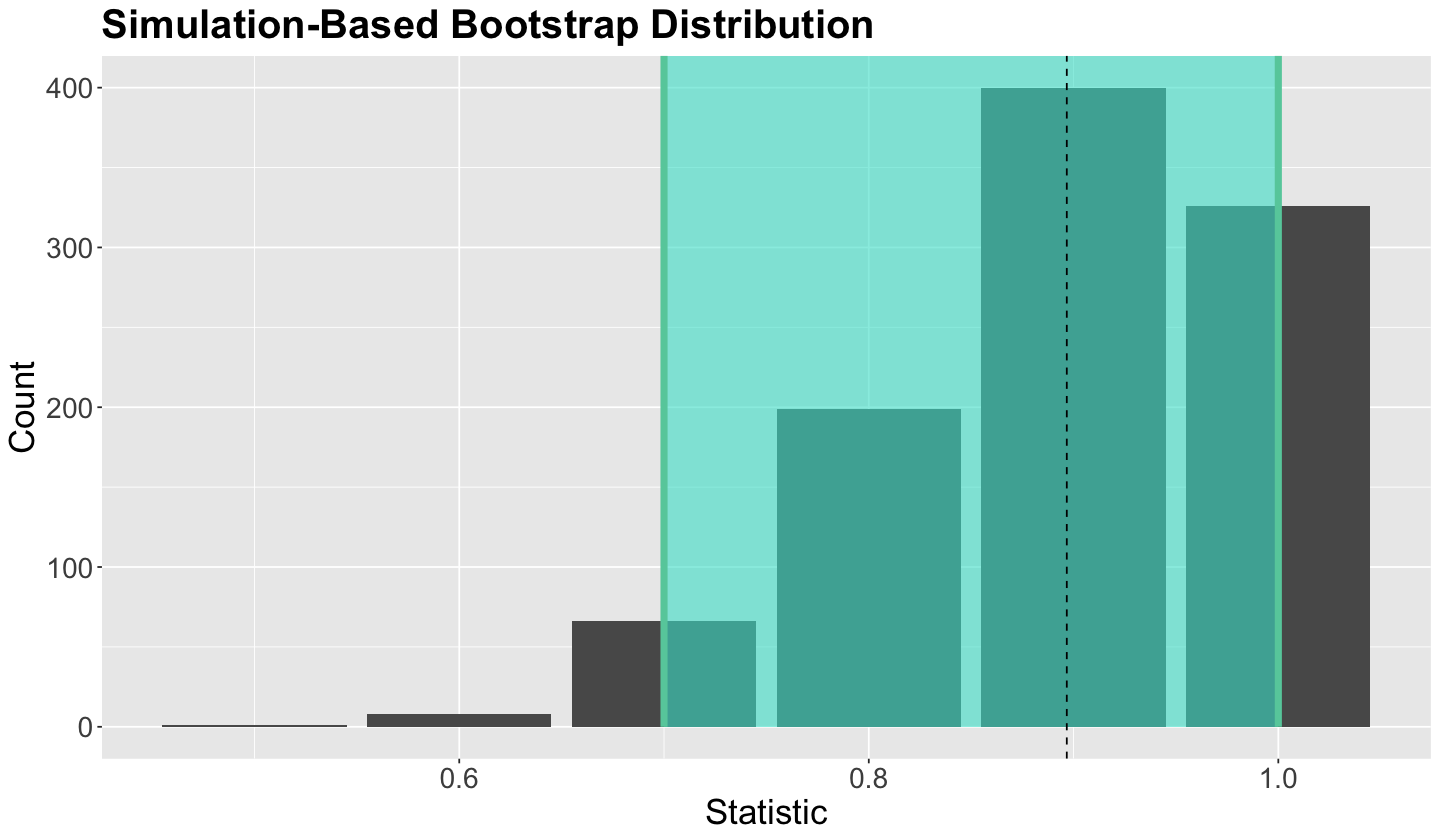

In [4]:
options(repr.plot.height = 7, repr.plot.width = 12)

bootstrap_plot <- bootstrap_distribution |>
  visualize(bins = 6) + 
  shade_confidence_interval(endpoints = percentile_CI) +
  geom_vline(xintercept = mean_stat, linetype = "dashed") +
  theme(
    plot.title = element_text(size = 24, face = "bold"),
    axis.text = element_text(size = 17),
    axis.title = element_text(size = 21)
  ) +
  labs(x = "Statistic", y = "Count")

bootstrap_plot

```{important}
Our 95% bootstrap CI shows **biased results**; the lower bound is 0.7! This is not good from an inferential perspective. An easy solution would be increasing the sample size $n$, but what if this is not possible? 

**Bayesian inference will open up our set of possible solutions to this matter.**
```

## 5. Difference between Probability and Likelihood

It is important to emphasize that in Statistics, **probability** and **likelihood** are **NOT** the same. In general, **probability** refers to the chance that some outcome of interest will happen for a particular random variable. Note a probability is always bounded between $0$ and $1$. Conversely, **given some observed data**, a **likelihood** refers to how **plausible** a given **distributional parameter** is. Furthermore, a likelihood is not bounded between $0$ and $1$.

Let us explore this concept via the Binomial distribution. Let $X$ be the number of succcesses after $n$ independent Bernoulli trials with probability of success $0 \leq \pi \leq 1$. Then, $X$ is said to have a Binomial distribution:

$$X \sim \text{Binomial} \left( n, \pi \right).$$

A Binomial distribution is characterized by the probability mass function (PMF) 

```{math}
:label: binomial-pmf
P \left(X = x \mid n, \pi \right) = {n \choose x} \pi^x (1 - \pi)^{n - x} \quad \text{for} \quad x = 0, 1, \dots, n.
```

Term ${n \choose x}$ indicates the total number of combinations for $x$ successes out of $n$ trials:

$${n \choose x} = \frac{n!}{x!(n - x)!}.$$

Let us plot the PMFs of six Binomial random variables. Note these plots indicate a **probability** $P \left( X = x \mid n, \pi \right)$ on their $y$-axes and they have the same number of trials $n = 10$:

- $n = 10$ and $\pi = 0.3$.
- $n = 10$ and $\pi = 0.4$.
- $n = 10$ and $\pi = 0.5$.
- $n = 10$ and $\pi = 0.6$.
- $n = 10$ and $\pi = 0.7$.
- $n = 10$ and $\pi = 0.8$.

Suppose we are specifically interested in the outcome $Y = 5$, highlighted as a red bar in the six PMFs. We also indicate the **probabilities** associated to each outcome on top of each bar.

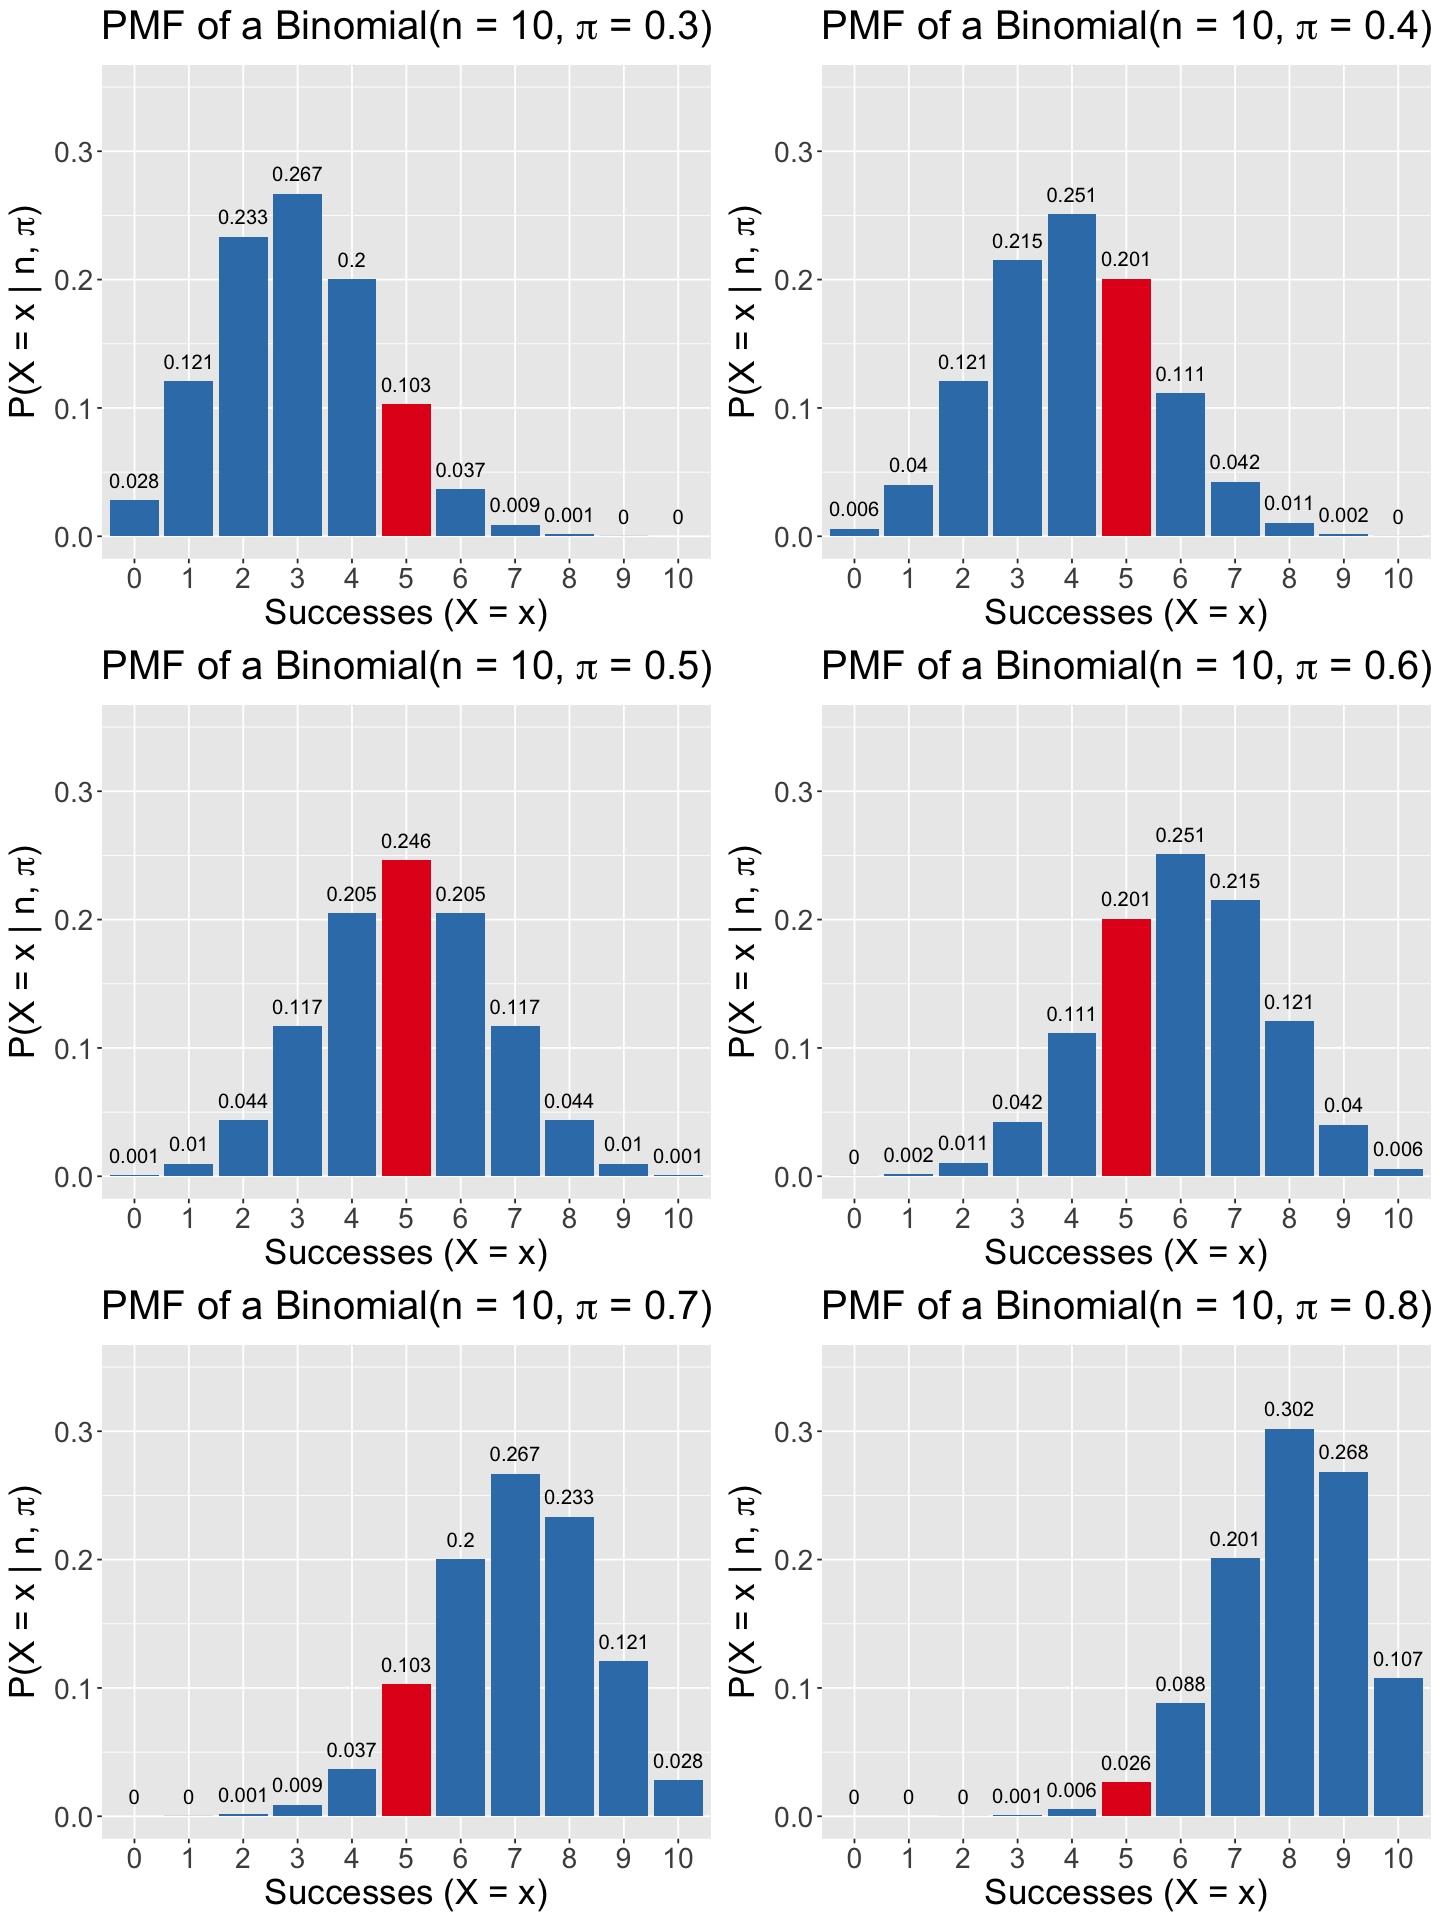

In [5]:
options(repr.plot.height = 16, repr.plot.width = 12)

binomial_PMF <- function(n, pi, interest) {
  PMF <- data.frame(outcome = 0:n, pi = dbinom(x = 0:n, size = n, prob = pi)) |>
    mutate(flag = ifelse(outcome == interest, "interest", "other")) |>
    ggplot(aes(x = factor(outcome), y = pi, fill = flag)) +
    geom_col() +
    geom_text(
      aes(label = round(pi, 3), y = pi + 0.01),
      position = position_dodge(0.9),
      size = 4.25,
      vjust = 0
    ) +
    labs(
      x = "Successes (X = x)",
      y = expression(paste(P, "(X = x | n, ", pi, ")"))
    ) +
    theme(
      plot.title = element_text(size = 24),
      axis.text = element_text(size = 17),
      axis.title = element_text(size = 21),
      legend.position = "none"
    ) + 
    ylim(0, 0.35) + 
    scale_fill_brewer(palette = "Set1")

  return(PMF)
}

plot_grid(binomial_PMF(n = 10, pi = 0.3, interest = 5) +
  ggtitle(expression(paste("PMF of a Binomial(n = 10, ", pi, " = 0.3)"))),
          binomial_PMF(n = 10, pi = 0.4, interest = 5) +
  ggtitle(expression(paste("PMF of a Binomial(n = 10, ", pi, " = 0.4)"))),
          binomial_PMF(n = 10, pi = 0.5, interest = 5) +
  ggtitle(expression(paste("PMF of a Binomial(n = 10, ", pi, " = 0.5)"))),
          binomial_PMF(n = 10, pi = 0.6, interest = 5) +
  ggtitle(expression(paste("PMF of a Binomial(n = 10, ", pi, " = 0.6)"))),
          binomial_PMF(n = 10, pi = 0.7, interest = 5) +
  ggtitle(expression(paste("PMF of a Binomial(n = 10, ", pi, " = 0.7)"))),
          binomial_PMF(n = 10, pi = 0.8, interest = 5) +
  ggtitle(expression(paste("PMF of a Binomial(n = 10, ", pi, " = 0.8)"))), ncol = 2)

Suppose we sample data from a given Binomial population of interest, and this sample is composed of $n = 10$ trials and $x = 5$ successes. Under a frequentist paradigm, we are interested in inferring that value of $\pi$, which is the **most likely** for these values of $n$ and $x$. Then, this is what we can do:

- Our PMF {eq}`binomial-pmf` will become a likelihood function **given** $n = 10$ and **our observed** $x = 5$ successes (note the lowercase $x$):

```{math}
:label: binomial-likelihood-example
\begin{align*}
\mathscr{l}(\pi \mid x = 5, n = 10) &= P \left(X = 5 \mid n = 10, \pi \right) \\
&= {10 \choose 5} \pi^5 (1 - \pi)^{10 - 5}.
\end{align*}
```

```{attention}
The likelihood {eq}`binomial-likelihood-example` is **mathematically** equal to the Binomial PMF with $n = 10$ and $X = 5$. Nevertheless, this likelihood is now **in function** of the parameter $\pi$.
```

- That said, the below plot shows the likelihood function {eq}`binomial-likelihood-example` with the plausible range of $\pi$ on the $x$-axis (which is bounded between $0$ and $1$ since it is the probability of success in the Binomial distribution). Moreover, the likelihood values are indicated in the $y$-axis.

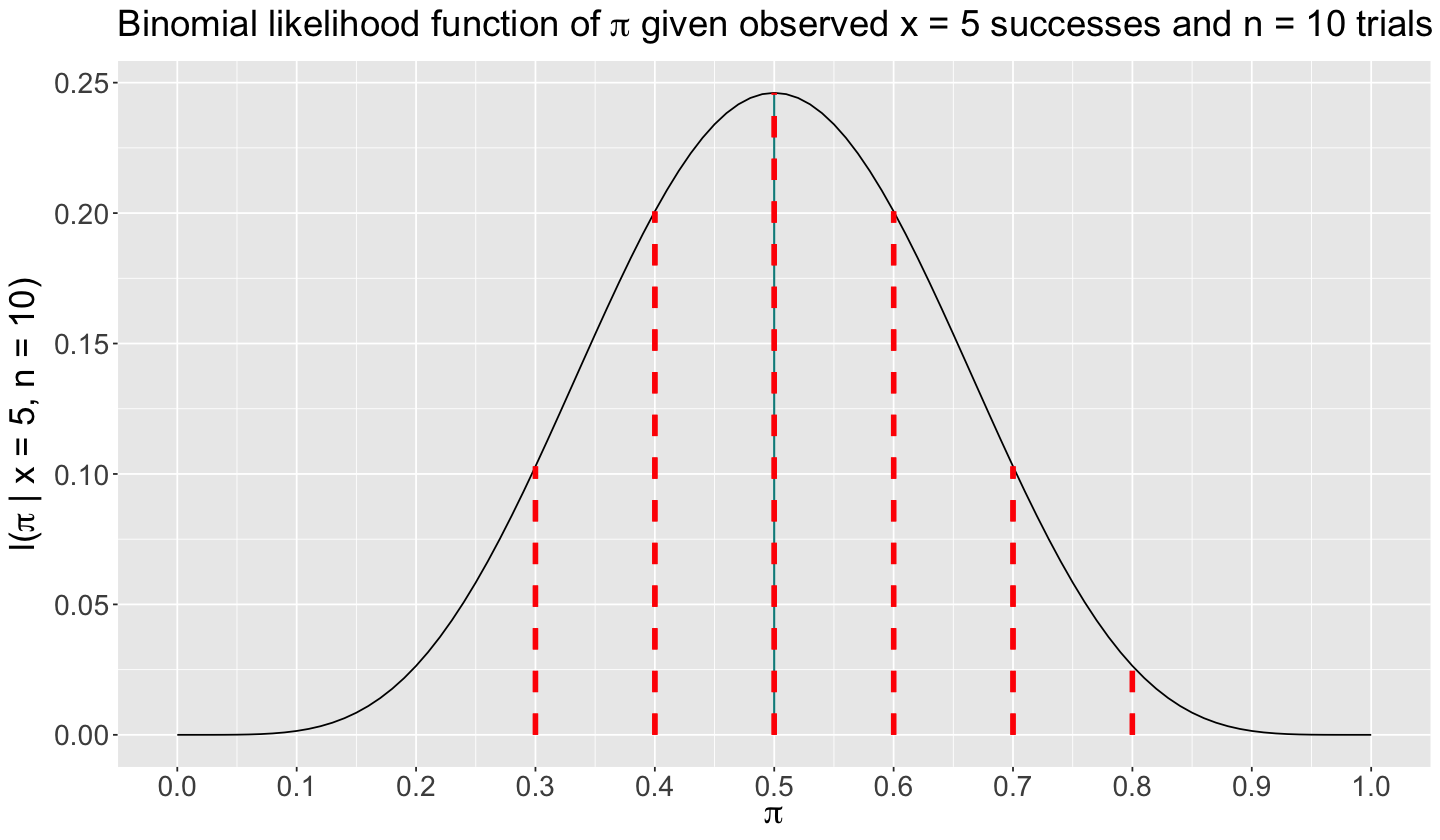

In [6]:
options(repr.plot.height = 7, repr.plot.width = 12)

plot_binomial_likelihood_pi <- plot_binomial_likelihood(y = 5, n = 10, mle = TRUE) +
    ylab(expression(paste(l, "(", pi, " | x = 5, n = 10)"))) +
  theme(
    plot.title = element_text(size = 22, face = "bold"),
    axis.text = element_text(size = 17),
    axis.title = element_text(size = 21, face = "bold")
  ) +
  geom_segment(aes(x = 0.3, y = 0, xend = 0.3, yend = dbinom(x = 5, size = 10, prob = 0.3)), 
                   color = "red", linetype  ="dashed", linewidth = 1.5) +
  geom_segment(aes(x = 0.4, y = 0, xend = 0.4, yend = dbinom(x = 5, size = 10, prob = 0.4)), 
                   color = "red", linetype  ="dashed", linewidth = 1.5) +
  geom_segment(aes(x = 0.5, y = 0, xend = 0.5, yend = dbinom(x = 5, size = 10, prob = 0.5)), 
                   color = "red", linetype  ="dashed", linewidth = 1.5) +
  geom_segment(aes(x = 0.6, y = 0, xend = 0.6, yend = dbinom(x = 5, size = 10, prob = 0.6)), 
                   color = "red", linetype  ="dashed", linewidth = 1.5) +
  geom_segment(aes(x = 0.7, y = 0, xend = 0.7, yend = dbinom(x = 5, size = 10, prob = 0.7)), 
                   color = "red", linetype  ="dashed", linewidth = 1.5) +
  geom_segment(aes(x = 0.8, y = 0, xend = 0.8, yend = dbinom(x = 5, size = 10, prob = 0.8)), 
                   color = "red", linetype  ="dashed", linewidth = 1.5) + 
  scale_x_continuous(breaks = seq(0, 1, by = 0.1)) +
  ggtitle(expression(paste("Binomial likelihood function of ", pi, " given observed x = 5 successes and n = 10 trials")))

suppressWarnings(print(plot_binomial_likelihood_pi))

In the above likelihood plot, we highlighted as red vertical dashed lines those values corresponding to the red bars in the previous six Binomial PMFs (**since a probability is MATHEMATICALLY equal to a likelihood, but not STATISTICALLY**).

The plot shows that the likelihood function {eq}`binomial-likelihood-example` gets maximized when $\pi = 0.5$. That said, given our observed collected sample with $x = 5$ successes with $n = 10$, a value of $\pi = 0.5$ is **the most plausible (or likely!)** in this Binomial population.  

## 6. Wrapping Up with Frequentist Drawbacks

- We cannot incorporate our "expert" intuition, probabilistically speaking.
- How do we use side information, e.g., results of flips from other bottle caps?
- Asymptotic tools tend not to work well with small amounts of data.